Saving Jempol_Ngadep_Atas_(cropped).jpg to Jempol_Ngadep_Atas_(cropped) (2).jpg


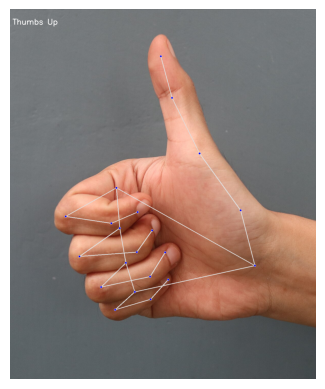

Identified Gestures:
Thumbs Up


In [5]:
# Step 1: Install the required libraries
!pip install opencv-python mediapipe

# Step 2: Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import cv2
import numpy as np
import mediapipe as mp
from google.colab import files
import matplotlib.pyplot as plt

# Step 3: Upload the image
uploaded = files.upload()

# Step 4: Load and process the image
for filename in uploaded.keys():
    # Read the image
    image = cv2.imread(filename)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Initialize MediaPipe Hands
    mp_hands = mp.solutions.hands
    hands = mp_hands.Hands(max_num_hands=2, min_detection_confidence=0.7)

    # Process the image to detect hands
    results = hands.process(image_rgb)

    # Function to identify gesture based on hand landmarks
    def identify_gesture(hand_landmarks):
        if hand_landmarks:
            thumb_tip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_TIP]
            thumb_ip = hand_landmarks.landmark[mp_hands.HandLandmark.THUMB_IP]
            return "Thumbs Up" if thumb_tip.y < thumb_ip.y else "Unknown Gesture"
        return "No Hand Detected"

    gesture_results = []  # To store identified gestures

    # Draw landmarks and identify gestures
    if results.multi_hand_landmarks:
        for hand_landmarks in results.multi_hand_landmarks:
            # Draw landmarks
            mp.solutions.drawing_utils.draw_landmarks(image_rgb, hand_landmarks, mp_hands.HAND_CONNECTIONS)
            gesture = identify_gesture(hand_landmarks)
            gesture_results.append(gesture)
            cv2.putText(image_rgb, gesture, (10, 30 + 30 * len(gesture_results)), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2)

    # Display the processed image
    plt.imshow(image_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

    # Display identified gestures
    if gesture_results:
        print("Identified Gestures:")
        for result in gesture_results:
            print(result)
    else:
        print("No hands detected.")
